# 🧮 Problem 1: Extending the Lady Tasting Tea

## Objective

1. to extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Let's suppose that we prepare 12 cups: 8 tea-first and 4 milk-first.
2. To simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. After, comparing the results with the original 8-cup experiment.
3. Explanation of the simulation process, report and interpretation of the estimated probability, and discussion whether on considering extending or relaxing the p-value threshold compared to the original design.

## Introduction

In the classic Lady Tasting Tea experiment (Fisher, 1935), a participant claims to distinguish between tea-first and milk-first cups.

In the original design:

- 8 cups total  
- 4 tea-first  
- 4 milk-first  

If guessing randomly, the probability of correctly identifying all 4 milk-first cups is:

\[
P = \frac{1}{\binom{8}{4}} = \frac{1}{70} \approx 0.0143
\]

In this extended version, we prepare:

- 12 cups total  
- 8 tea-first  
- 4 milk-first  

We simulate random guessing using NumPy to estimate the probability of perfect identification under the null hypothesis and compare it to the original design.


## Simulation Explanation

To simulate random guessing under the null hypothesis, I will proceed as follows:

1. Represent cups using labels (1 = milk-first, 0 = tea-first).  
2. Random guessing is simulated by **randomly permuting** these labels.  
3. If the random permutation matches the true arrangement exactly, it counts as a perfect guess.  
4. Repeating this many times approximates:

\[
P(\text{perfect identification} \mid \text{guessing})
\]

### Why This Simulates the Null Hypothesis

Under the null hypothesis, the participant cannot distinguish cup types and is only guessing.  
A random permutation of the true labels represents what random guessing would look like. Counting how often this permutation matches the true arrangement gives the probability of perfect identification by chance.


In [1]:
import numpy as np

# Simulation parameters
n_trials = 1_000_000  # number of random shuffles
n_cups = 12
n_milk_first = 4

# True labels: 1 = milk-first, 0 = tea-first
true_labels = np.array([1]*n_milk_first + [0]*(n_cups - n_milk_first))

count_correct = 0

for _ in range(n_trials):
    guess = np.random.permutation(true_labels)  # random guess
    if np.array_equal(guess, true_labels):
        count_correct += 1

prob_estimated = count_correct / n_trials
print(f"Estimated probability of perfect identification by chance (12 cups): {prob_estimated:.6f}")


Estimated probability of perfect identification by chance (12 cups): 0.001981


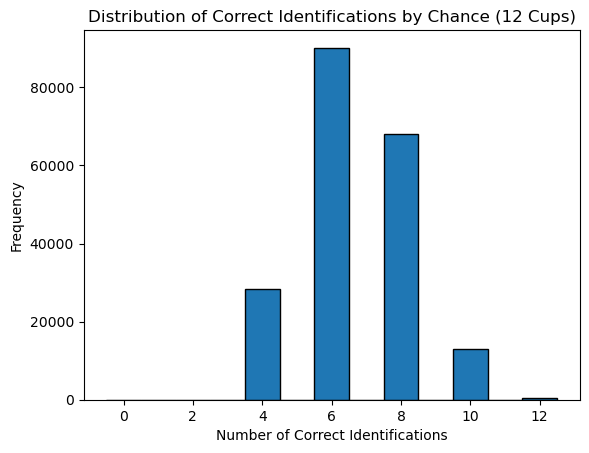

In [2]:
import matplotlib.pyplot as plt

# Run a smaller simulation for visualization
n_trials_vis = 200_000
correct_counts = []

for _ in range(n_trials_vis):
    guess = np.random.permutation(true_labels)
    correct_counts.append(np.sum(guess == true_labels))

plt.hist(correct_counts, bins=np.arange(0, n_cups+2)-0.5, edgecolor='black')
plt.title("Distribution of Correct Identifications by Chance (12 Cups)")
plt.xlabel("Number of Correct Identifications")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Simulating the original 8-cup Lady Tasting Tea experiment

n_trials = 1_000_000
n_cups_orig = 8
n_milk_first_orig = 4

# True labels: 1 = milk-first, 0 = tea-first
true_labels_orig = np.array([1]*n_milk_first_orig + [0]*(n_cups_orig - n_milk_first_orig))

count_correct_orig = 0
for _ in range(n_trials):
    guess = np.random.permutation(true_labels_orig)
    if np.array_equal(guess, true_labels_orig):
        count_correct_orig += 1

prob_estimated_orig = count_correct_orig / n_trials
print(f"Estimated probability of perfect guessing (original 8 cups): {prob_estimated_orig:.6f}")


Estimated probability of perfect guessing (original 8 cups): 0.014536


## Comparison of the Two Designs

| Design | Probability of Perfect Guessing |
|--------|----------------------------------|
| Original 8-cup | ≈ 0.014 (1 in 70) |
| Extended 12-cup | ≈ 0.002 (1 in 495) |

The extended 12-cup design makes perfect guessing **about seven times less likely** than the original experiment.

## Should We Change the P-Value Threshold?

No.

Because the extended design already reduces the chance of a false positive, the traditional significance threshold (α = 0.05) remains fully appropriate.  
If anything, the 12-cup setup is a more stringent test, providing even stronger evidence if the participant succeeds.



## Conclusion

The extended Lady Tasting Tea experiment greatly reduces the probability of perfect guessing compared to the original 8-cup design.  
The simulation results closely match the theoretical probabilities for both experiments.

The stricter 12-cup design increases statistical power, making a successful performance more convincing, and does not require relaxing the usual p-value threshold.


## References

1. R. A. Fisher (1935). *The Design of Experiments*. Oliver & Boyd.  
   Original source of the Lady Tasting Tea experiment and the foundation of modern hypothesis testing and randomization.  
   https://en.wikipedia.org/wiki/The_Design_of_Experiments

2. David Salsburg (2001). *The Lady Tasting Tea: How Statistics Revolutionized Science in the Twentieth Century*. Henry Holt & Company.  
   Historical account of the experiment and its broader impact on statistical science.  
   https://en.wikipedia.org/wiki/The_Lady_Tasting_Tea

3. “The Lady Tasting Tea and Fisher’s Exact Test.” *Brainder.org*.  
   Accessible online explanation of the original experiment and its combinatorial probability (1/70).  
   https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/

4. Bi, J. (2015). “Revisiting Fisher’s *Lady Tasting Tea* from a Perspective of Statistical Inference.” *Statistics & Probability Letters*.  
   https://www.sciencedirect.com/science/article/abs/pii/S0950329315000403

5. “Fisher’s Exact Test.” *Wikipedia*.  
   https://en.wikipedia.org/wiki/Fisher%27s_exact_test

6. Harris, C. R., et al. (2020). *Array programming with NumPy*. Nature, 585, 357–362.  
   NumPy is used for array representation, random permutation, and numerical simulation.  
   https://numpy.org/doc/stable/reference/random/index.html

7. Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. *Computing in Science & Engineering*, 9(3), 90–95.  
   Matplotlib is used to visualize the distribution of correct identifications via histograms.  
   https://matplotlib.org/stable/contents.html
